<a href="https://colab.research.google.com/github/jwphantom/tfr-analysis/blob/main/tfr%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import io
from tabulate import tabulate

# Demande de téléchargement du fichier
uploaded = files.upload()

# Obtenir le nom du fichier téléchargé
nom_fichier = list(uploaded.keys())[0]

# Lire le contenu du fichier texte
with open(nom_fichier, 'r') as fichier:
    contenu = fichier.read()

# Créer un dataframe à partir du contenu du fichier texte
data = pd.read_csv(io.StringIO(contenu), delimiter=' ')

# Afficher le dataframe sous forme de tableau
#print(tabulate(data, headers='keys', tablefmt='psql'))



Saving UnitedNations.csv to UnitedNations.csv


In [2]:
# Conversion en DataFrame
df = pd.DataFrame(data)

# Affichage du tableau
display(df)

,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.000
Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000
American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.360
Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western.Sahara,Africa,3.98,NaN,NaN,NaN,59.8,63.1,64.0,NaN,NaN,NaN,NaN,NaN
Yemen,Asia,7.60,7.0,NaN,NaN,57.4,58.4,80.0,732.0,80.6,1.9,32.406,69.552
Yugoslavia,Europe,1.80,NaN,NaN,NaN,69.8,75.3,19.0,1487.0,NaN,NaN,1.782,9.072
Zambia,Africa,5.49,25.0,7.9,6.8,42.2,43.7,103.0,382.0,NaN,NaN,14.400,28.700


# **I - Description des variables données**

**1- Type de données**

In [3]:
print(df.dtypes)

region                     object
tfr                       float64
contraception             float64
educationMale             float64
educationFemale           float64
lifeMale                  float64
lifeFemale                float64
infantMortality           float64
GDPperCapita              float64
economicActivityMale      float64
economicActivityFemale    float64
illiteracyMale            float64
illiteracyFemale          float64
dtype: object


**2- Valeurs manquantes et transformation**

In [4]:
print(df.isnull().sum())

region                      0
tfr                        10
contraception              63
educationMale             131
educationFemale           131
lifeMale                   11
lifeFemale                 11
infantMortality             6
GDPperCapita               10
economicActivityMale       42
economicActivityFemale     42
illiteracyMale             47
illiteracyFemale           47
dtype: int64


imputation par la moyenne


In [5]:
# Calculer la moyenne de chaque variable et arrondir au centième près
mean_values = df.mean().round(2)

# Remplir les valeurs manquantes avec les moyennes arrondies au centième près
df_imputed = df.fillna(mean_values.round(2))

# Afficher le dataframe avec les valeurs arrondies au centième près
display(df_imputed)


<ipython-input-5-674af13a5388>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean().round(2)


,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
Afghanistan,Asia,6.90,43.43,11.41,11.28,45.00,46.00,154.00,2848.00,87.50,7.20,52.800,85.000
Albania,Europe,2.60,43.43,11.41,11.28,68.00,74.00,32.00,863.00,76.46,46.79,17.550,27.910
Algeria,Africa,3.81,52.00,11.10,9.90,67.50,70.30,44.00,1531.00,76.40,7.80,26.100,51.000
American.Samoa,Asia,3.53,43.43,11.41,11.28,68.00,73.00,11.00,6261.95,58.80,42.40,0.264,0.360
Andorra,Europe,3.53,43.43,11.41,11.28,63.63,68.39,43.48,6261.95,76.46,46.79,17.550,27.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western.Sahara,Africa,3.98,43.43,11.41,11.28,59.80,63.10,64.00,6261.95,76.46,46.79,17.550,27.910
Yemen,Asia,7.60,7.00,11.41,11.28,57.40,58.40,80.00,732.00,80.60,1.90,32.406,69.552
Yugoslavia,Europe,1.80,43.43,11.41,11.28,69.80,75.30,19.00,1487.00,76.46,46.79,1.782,9.072
Zambia,Africa,5.49,25.00,7.90,6.80,42.20,43.70,103.00,382.00,76.46,46.79,14.400,28.700


**3 - Vérification de l'existance des doublons**

In [6]:
# Find duplicate rows in the DataFrame
duplicates = df.duplicated()

# Select rows with duplicates
duplicated_rows = df[duplicates]

# Display the duplicated rows
print(duplicated_rows)

Empty DataFrame
Columns: [region, tfr, contraception, educationMale, educationFemale, lifeMale, lifeFemale, infantMortality, GDPperCapita, economicActivityMale, economicActivityFemale, illiteracyMale, illiteracyFemale]
Index: []


**4 - Vérification des valeurs aberrantes **

> contraception

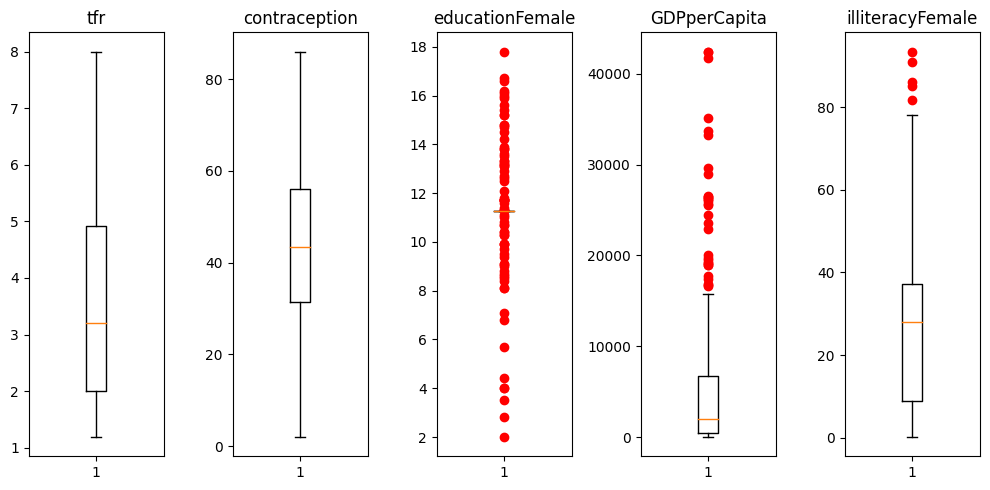

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Définir le dataframe avec des valeurs fictives
df = pd.DataFrame(data)

# Créer une figure avec 4 sous-graphiques
fig, axes = plt.subplots(1, 5, figsize=(10, 5))

# Tracer le premier diagramme de boîte sur le premier sous-graphique
axes[0].boxplot(df_imputed['tfr'], sym='ro')
axes[0].set_title('tfr')

# Tracer le premier diagramme de boîte sur le deuxième sous-graphique
axes[1].boxplot(df_imputed['contraception'], sym='ro')
axes[1].set_title('contraception')

# Tracer le deuxième diagramme de boîte sur le troisième sous-graphique
axes[2].boxplot(df_imputed['educationFemale'], sym='ro')
axes[2].set_title('educationFemale')

# Tracer le troisième diagramme de boîte sur le quatrième sous-graphique
axes[3].boxplot(df_imputed['GDPperCapita'], sym='ro')
axes[3].set_title('GDPperCapita')

# Tracer le quatrième diagramme de boîte sur le cinquième sous-graphique
axes[4].boxplot(df_imputed['illiteracyFemale'], sym='ro')
axes[4].set_title('illiteracyFemale')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


# **II - Analyse descriptive**

---



> **1 - résumé des variables**

In [8]:
from tabulate import tabulate
from prettytable import PrettyTable
# Résumé des variables
summary = df_imputed.describe(include='all').round(2)

summary = summary.drop(['unique', 'top', 'freq'], axis=0)

summary = summary.transpose()

# Affichage du résumé
display(summary)

,count,mean,std,min,25%,50%,75%,max
region,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tfr,207.0,3.53,1.72,1.19,2.01,3.21,4.93,8.0
contraception,207.0,43.43,19.75,2.0,31.5,43.43,56.0,86.0
educationMale,207.0,11.41,1.84,3.3,11.41,11.41,11.41,17.2
educationFemale,207.0,11.28,2.1,2.0,11.28,11.28,11.28,17.8
lifeMale,207.0,63.63,9.52,36.0,57.85,66.0,70.5,77.4
lifeFemale,207.0,68.39,10.74,39.1,60.9,71.7,76.1,82.9
infantMortality,207.0,43.48,38.19,2.0,12.0,31.0,65.0,169.0
GDPperCapita,207.0,6261.95,9125.76,36.0,495.0,2059.0,6774.5,42416.0
economicActivityMale,207.0,76.46,6.86,51.2,74.0,76.46,80.1,93.0


# **III- Analyse univariée**


> **1- Variable tfr** \

a) répartition de variable

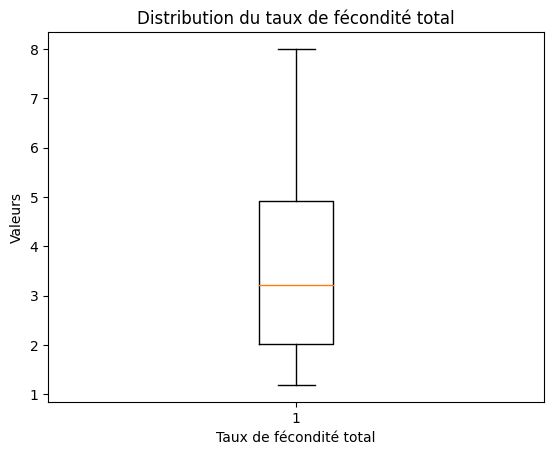

In [9]:
import matplotlib.pyplot as plt

# Sélectionner les variables d'intérêt
variables = ['tfr', 'contraception', 'educationFemale', 'illiteracyFemale' ]

# Création du diagramme en boîte
plt.boxplot(df_imputed["tfr"])

# Ajout de labels et titre
plt.xlabel('Taux de fécondité total')
plt.ylabel('Valeurs')
plt.title('Distribution du taux de fécondité total')

# Affichage du diagramme
plt.show()


b) Test de normalité de Kolmogorov-Smirnov

In [10]:
import scipy.stats as stats

# Échantillon de tfr (remplacez par vos propres données)

# Effectuer le test de normalité de Kolmogorov-Smirnov
statistic, p_value = stats.kstest(df_imputed["tfr"], 'norm')

# Afficher les résultats
print("Test de normalité de Kolmogorov-Smirnov")
print("Statistique de test :", statistic)
print("Valeur de p :", p_value)


Test de normalité de Kolmogorov-Smirnov
Statistique de test : 0.8935376796655974
Valeur de p : 9.604741583589717e-202


> **2- variable contraception**

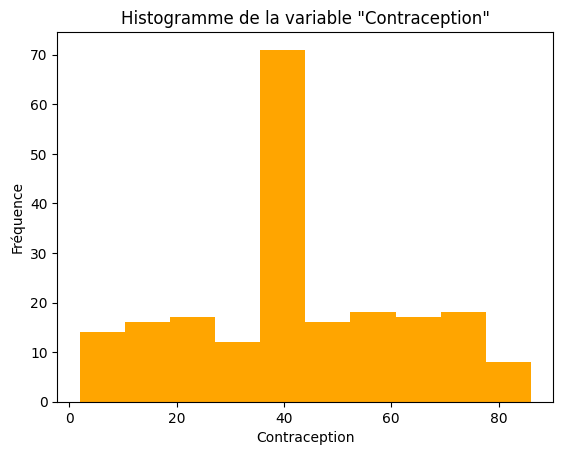

In [11]:
# Sélectionner les variables d'intérêt
variables = ['tfr', 'contraception', 'educationFemale', 'illiteracyFemale' ]

# Tracé de l'histogramme
plt.hist(df_imputed["contraception"], bins=10, color='orange')

# Paramètres du graphique
plt.xlabel('Contraception')
plt.ylabel('Fréquence')
plt.title('Histogramme de la variable "Contraception"')

# Affichage du graphique
plt.show()

> **3- Variable lifeMale et lifeFemale**

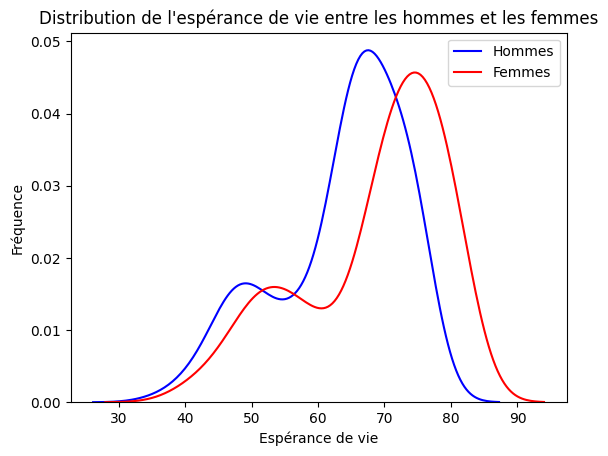

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Données d'espérance de vie des hommes et des femmes
lifeMale_data = df_imputed["lifeMale"]
lifeFemale_data = df_imputed["lifeFemale"]

# Création du graphique de densité pour lifeMale
sns.kdeplot(lifeMale_data, color='blue', label='Hommes')

# Création du graphique de densité pour lifeFemale
sns.kdeplot(lifeFemale_data, color='red', label='Femmes')

# Ajout de labels et du titre
plt.xlabel('Espérance de vie')
plt.ylabel('Fréquence')
plt.title('Distribution de l\'espérance de vie entre les hommes et les femmes')

# Ajout de la légende
plt.legend()

# Affichage du graphe combiné
plt.show()


> **4- Variable economicActivityMale et economicActivityFemale**

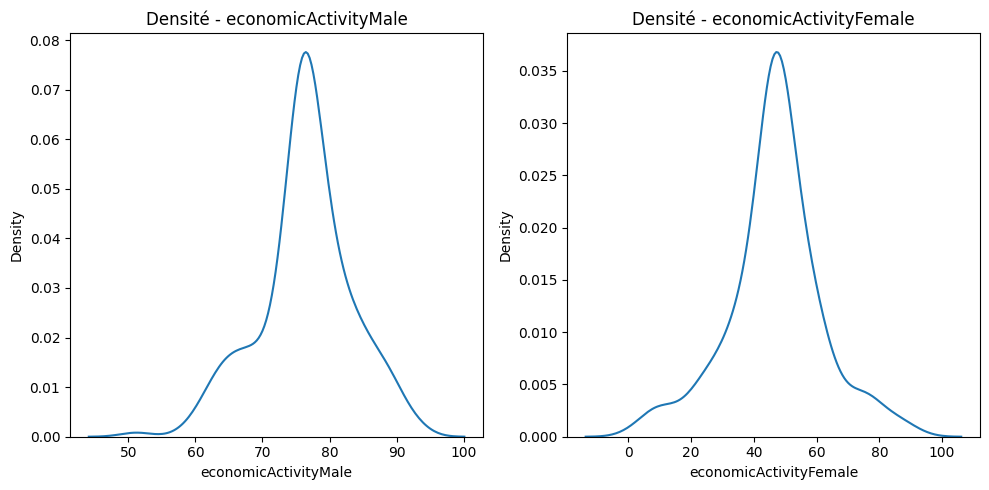

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Graphique de densité pour economicActivityMale
sns.kdeplot(data=df_imputed['economicActivityMale'], ax=axes[0])
axes[0].set_title('Densité - economicActivityMale')

# Graphique de densité pour economicActivityFemale
sns.kdeplot(data=df_imputed['economicActivityFemale'], ax=axes[1])
axes[1].set_title('Densité - economicActivityFemale')

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()

# Affichage du graphique
plt.show()


# **IV - Analyse multi variée**

> **1- matrice de correlation**

In [14]:

# Sélectionnez les variables numériques pertinentes
variables = ['tfr', 'contraception', 'educationFemale', 'lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita',
             'economicActivityMale', 'economicActivityFemale', 'illiteracyMale', 'illiteracyFemale']

# Créez une sous-dataframe avec les variables sélectionnées
df_corr = df_imputed[variables]

# Calculez la matrice de corrélation
correlation_matrix = df_corr.corr().round(2)

# Affichez la matrice de corrélation
display(correlation_matrix)

,tfr,contraception,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
tfr,1.00,-0.65,-0.47,-0.77,-0.83,0.79,-0.46,0.37,-0.16,0.62,0.66
contraception,-0.65,1.00,0.48,0.61,0.62,-0.59,0.42,-0.15,0.10,-0.46,-0.46
educationFemale,-0.47,0.48,1.00,0.45,0.47,-0.43,0.47,-0.26,0.04,-0.26,-0.29
lifeMale,-0.77,0.61,0.45,1.00,0.98,-0.92,0.54,-0.24,-0.08,-0.59,-0.63
lifeFemale,-0.83,0.62,0.47,0.98,1.00,-0.94,0.53,-0.29,-0.02,-0.63,-0.69
infantMortality,0.79,-0.59,-0.43,-0.92,-0.94,1.00,-0.47,0.30,-0.01,0.67,0.72
GDPperCapita,-0.46,0.42,0.47,0.54,0.53,-0.47,1.00,-0.15,0.11,-0.17,-0.19
economicActivityMale,0.37,-0.15,-0.26,-0.24,-0.29,0.30,-0.15,1.00,0.10,0.37,0.35
economicActivityFemale,-0.16,0.10,0.04,-0.08,-0.02,-0.01,0.11,0.10,1.00,-0.08,-0.11
illiteracyMale,0.62,-0.46,-0.26,-0.59,-0.63,0.67,-0.17,0.37,-0.08,1.00,0.96


> **2- Analyse de regression**

**** Première itération : variable contraception

In [15]:
import statsmodels.api as sm


y = df_imputed['tfr']
X = df_imputed[['contraception']]

X = sm.add_constant(X)


In [16]:
def forward_selection(X, y):
    selected_features = []  # Liste pour stocker les variables indépendantes sélectionnées

    while len(selected_features) < X.shape[1]:  # Tant qu'il reste des variables à sélectionner
        best_pvalue = 1.0  # Meilleure valeur p initialement définie à 1.0
        best_feature = None  # Meilleure variable indépendante initialement définie à None

        for feature in X.columns:
            if feature not in selected_features:  # Vérifiez si la variable a déjà été sélectionnée
                model = sm.OLS(y, X[selected_features + [feature]]).fit()  # Ajustez le modèle avec les variables déjà sélectionnées et la variable à tester
                pvalue = model.pvalues[feature]  # Obtenez la valeur p pour la variable à tester

                if pvalue < best_pvalue:
                    best_pvalue = pvalue
                    best_feature = feature

        if best_feature is not None:
            selected_features.append(best_feature)
        else:
            break

    return selected_features

selected_features = forward_selection(X, y)

final_model = sm.OLS(y, X[selected_features]).fit()
display(final_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tfr   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           6.09e-26
Time:                        12:29:10   Log-Likelihood:                -349.18
No. Observations:                 207   AIC:                             702.4
Df Residuals:                     205   BIC:                             709.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9741      0.221     27.034      0.000       5.538       6.410
contraception    -0.0563      0.005    -12.151      0.000      -0.065      -0.047
==============================================================================
Omnibus:                        4.114   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                4.068
Skew:                           0.212   Prob(JB):                        0.131
Kurtosis:                       3.540   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**** Deuxième itération : variable lifeFemale

In [17]:
X['lifeFemale'] = df_imputed['lifeFemale']  # Ajoutez la variable 'educationFemale' à la matrice X existante

# Réexécutez le modèle de régression linéaire avec la matrice X mise à jour
final_model = sm.OLS(y, X[selected_features + ['lifeFemale']]).fit()


display(final_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tfr   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.24e-56
Time:                        12:29:10   Log-Likelihood:                -274.70
No. Observations:                 207   AIC:                             555.4
Df Residuals:                     204   BIC:                             565.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.9548      0.436     27.404      0.000      11.095      12.815
contraception    -0.0189      0.004     -4.578      0.000      -0.027      -0.011
lifeFemale       -0.1112      0.008    -14.661      0.000      -0.126      -0.096
==============================================================================
Omnibus:                       60.508   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.776
Skew:                           1.212   Prob(JB):                     5.56e-40
Kurtosis:                       6.884   Cond. No.                         567.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**** troisième itération : variable lifeMale

In [18]:
X['lifeMale'] = df_imputed['lifeMale']  # Ajoutez la variable 'lifeMale' à la matrice X existante

# Réexécutez le modèle de régression linéaire avec la matrice X mise à jour
final_model = sm.OLS(y, X[selected_features + ['lifeFemale', 'lifeMale']]).fit()

display(final_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tfr   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     228.3
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           9.11e-65
Time:                        12:29:10   Log-Likelihood:                -252.60
No. Observations:                 207   AIC:                             513.2
Df Residuals:                     203   BIC:                             526.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.0232      0.415     26.544      0.000      10.204      11.842
contraception    -0.0195      0.004     -5.240      0.000      -0.027      -0.012
lifeFemale       -0.3037      0.029    -10.646      0.000      -0.360      -0.247
lifeMale          0.2220      0.032      6.950      0.000       0.159       0.285
==============================================================================
Omnibus:                       58.178   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.357
Skew:                           1.151   Prob(JB):                     1.86e-39
Kurtosis:                       6.921   Cond. No.                         757.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**** Quatrième itération : variable economicActivityFemale

In [19]:
X['economicActivityFemale'] = df_imputed['economicActivityFemale']  # Ajoutez la variable 'lifeMale' à la matrice X existante

# Réexécutez le modèle de régression linéaire avec la matrice X mise à jour
final_model = sm.OLS(y, X[selected_features + ['lifeFemale', 'lifeMale', 'economicActivityFemale']]).fit()

display(final_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tfr   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     177.5
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           6.04e-65
Time:                        12:29:11   Log-Likelihood:                -249.30
No. Observations:                 207   AIC:                             508.6
Df Residuals:                     202   BIC:                             525.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11.7002      0.488     23.987      0.000      10.738      12.662
contraception             -0.0179      0.004     -4.805      0.000      -0.025      -0.011
lifeFemale                -0.2821      0.029     -9.601      0.000      -0.340      -0.224
lifeMale                   0.1947      0.033      5.851      0.000       0.129       0.260
economicActivityFemale    -0.0104      0.004     -2.558      0.011      -0.018      -0.002
==============================================================================
Omnibus:                       57.101   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.657
Skew:                           1.114   Prob(JB):                     3.58e-40
Kurtosis:                       7.013   Cond. No.                         986.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**** Cinquième itération : variable illiteracyFemale




In [20]:
X['illiteracyFemale'] = df_imputed['illiteracyFemale']  # Ajoutez la variable 'lifeMale' à la matrice X existante

# Réexécutez le modèle de régression linéaire avec la matrice X mise à jour
final_model = sm.OLS(y, X[selected_features + ['lifeFemale', 'lifeMale', 'economicActivityFemale','illiteracyFemale']]).fit()

display(final_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tfr   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           4.42e-64
Time:                        12:29:11   Log-Likelihood:                -248.62
No. Observations:                 207   AIC:                             509.2
Df Residuals:                     201   BIC:                             529.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11.2011      0.651     17.203      0.000       9.917      12.485
contraception             -0.0176      0.004     -4.726      0.000      -0.025      -0.010
lifeFemale                -0.2663      0.032     -8.219      0.000      -0.330      -0.202
lifeMale                   0.1832      0.035      5.284      0.000       0.115       0.252
economicActivityFemale    -0.0100      0.004     -2.471      0.014      -0.018      -0.002
illiteracyFemale           0.0041      0.004      1.156      0.249      -0.003       0.011
==============================================================================
Omnibus:                       59.092   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.591
Skew:                           1.140   Prob(JB):                     3.37e-43
Kurtosis:                       7.181   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**** Sixième itération : variable economicActivityMale


In [21]:
X['economicActivityMale'] = df_imputed['economicActivityMale']  # Ajoutez la variable 'lifeMale' à la matrice X existante

# Réexécutez le modèle de régression linéaire avec la matrice X mise à jour
final_model = sm.OLS(y, X[selected_features + ['lifeFemale', 'lifeMale', 'economicActivityFemale','illiteracyFemale', 'economicActivityMale']]).fit()

display(final_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tfr   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.54e-64
Time:                        12:29:11   Log-Likelihood:                -244.89
No. Observations:                 207   AIC:                             503.8
Df Residuals:                     200   BIC:                             527.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.4061      0.922     10.202      0.000       7.588      11.224
contraception             -0.0177      0.004     -4.826      0.000      -0.025      -0.010
lifeFemale                -0.2409      0.033     -7.245      0.000      -0.306      -0.175
lifeMale                   0.1567      0.036      4.412      0.000       0.087       0.227
economicActivityFemale    -0.0124      0.004     -3.037      0.003      -0.021      -0.004
illiteracyFemale           0.0026      0.004      0.717      0.474      -0.004       0.010
economicActivityMale       0.0249      0.009      2.709      0.007       0.007       0.043
==============================================================================
Omnibus:                       61.907   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.928
Skew:                           1.169   Prob(JB):                     1.06e-48
Kurtosis:                       7.489   Cond. No.                     2.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X['GDPperCapita'] = df_imputed['GDPperCapita']  # Ajoutez la variable 'lifeMale' à la matrice X existante

# Réexécutez le modèle de régression linéaire avec la matrice X mise à jour
final_model = sm.OLS(y, X[selected_features + ['lifeFemale', 'lifeMale', 'economicActivityFemale','illiteracyFemale', 'economicActivityMale', 'GDPperCapita']]).fit()

display(final_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tfr   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.69e-63
Time:                        12:29:11   Log-Likelihood:                -244.83
No. Observations:                 207   AIC:                             505.7
Df Residuals:                     199   BIC:                             532.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.3070      0.968      9.614      0.000       7.398      11.216
contraception             -0.0175      0.004     -4.721      0.000      -0.025      -0.010
lifeFemale                -0.2403      0.033     -7.202      0.000      -0.306      -0.175
lifeMale                   0.1579      0.036      4.415      0.000       0.087       0.228
economicActivityFemale    -0.0121      0.004     -2.886      0.004      -0.020      -0.004
illiteracyFemale           0.0030      0.004      0.787      0.432      -0.004       0.010
economicActivityMale       0.0245      0.009      2.642      0.009       0.006       0.043
GDPperCapita           -2.702e-06   7.88e-06     -0.343      0.732   -1.82e-05    1.28e-05
==============================================================================
Omnibus:                       61.513   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.264
Skew:                           1.160   Prob(JB):                     1.48e-48
Kurtosis:                       7.490   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""